<a href="https://colab.research.google.com/github/RoushanKhalid/NLP_101/blob/main/Project04_Kindle_Review_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About the Dataset: Amazon Kindle Book Reviews

### Context

This dataset is a 5-core subset of product reviews from the Amazon Kindle Store category. It covers the period from **May 1996 to July 2014**, containing a total of **982,619** review entries. Each product and reviewer in this dataset has at least **5 reviews**, ensuring meaningful data for analysis.

### Dataset Features

- `asin`: Unique product ID (e.g., B000FA64PK)
- `helpful`: Helpfulness rating of the review (e.g., 2/3)
- `overall`: Product rating (1 to 5)
- `reviewText`: Full text of the review
- `reviewTime`: Date of the review
- `reviewerID`: Unique ID of the reviewer
- `reviewerName`: Name of the reviewer
- `summary`: Short summary/title of the review
- `unixReviewTime`: Review timestamp in Unix format

### Acknowledgements

This dataset is taken from the [Amazon Product Data repository by Julian McAuley, UCSD](http://jmcauley.ucsd.edu/data/amazon/).  
Licensing and usage rights belong to the original authors.

---

## Project Goals and Motivation

- Perform sentiment analysis on customer reviews
- Understand what factors influence review helpfulness
- Detect fake or outlier reviews
- Identify best-rated products using review data
- Explore similarity between products based on review content

---

## Workflow and Best Practices

1. Preprocessing and cleaning the text data
2. Splitting the dataset into training and test sets
3. Feature extraction using:
   - Bag of Words (BoW)
   - TF-IDF
   - Word2Vec
4. Model training and evaluation using:
   - Logistic Regression
   - Naive Bayes
   - Random Forest
   - Support Vector Machines (SVM)

---

This notebook begins by exploring and preparing the dataset for machine learning tasks.


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
data = pd.read_csv('/content/all_kindle_review.csv')
data

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000
...,...,...,...,...,...,...,...,...,...,...,...
11995,11995,2183,B001DUGORO,"[0, 0]",4,Valentine cupid is a vampire- Jena and Ian ano...,"02 28, 2014",A1OKS5Q1HD8WQC,lisa jon jung,jena,1393545600
11996,11996,6272,B002JCSFSQ,"[2, 2]",5,I have read all seven books in this series. Ap...,"05 16, 2011",AQRSPXLNEQAMA,TerryLP,Peacekeepers Series,1305504000
11997,11997,12483,B0035N1V7K,"[0, 1]",3,This book really just wasn't my cuppa. The si...,"07 26, 2013",A2T5QLT5VXOJAK,hwilson,a little creepy,1374796800
11998,11998,3640,B001W1XT40,"[1, 2]",1,"tried to use it to charge my kindle, it didn't...","09 17, 2013",A28MHD2DDY6DXB,"Allison A. Slater ""Gryphon50""",didn't work,1379376000


In [16]:
data = data[['reviewText', 'rating']]
data

,reviewText,rating
0,"Jace Rankin may be short, but he's nothing to ...",3
1,Great short read. I didn't want to put it dow...,5
2,I'll start by saying this is the first of four...,3
3,Aggie is Angela Lansbury who carries pocketboo...,3
4,I did not expect this type of book to be in li...,4
...,...,...
11995,Valentine cupid is a vampire- Jena and Ian ano...,4
11996,I have read all seven books in this series. Ap...,5
11997,This book really just wasn't my cuppa. The si...,3
11998,"tried to use it to charge my kindle, it didn't...",1


In [17]:
data.shape

(12000, 2)

In [18]:
# Missing Values
data.isnull().sum()

,0
reviewText,0
rating,0


In [21]:
data['rating'].unique()

array([3, 5, 4, 2, 1])

In [22]:
data['rating'].value_counts()

,count
rating,
5,3000
4,3000
3,2000
2,2000
1,2000


<Axes: xlabel='rating', ylabel='Count'>

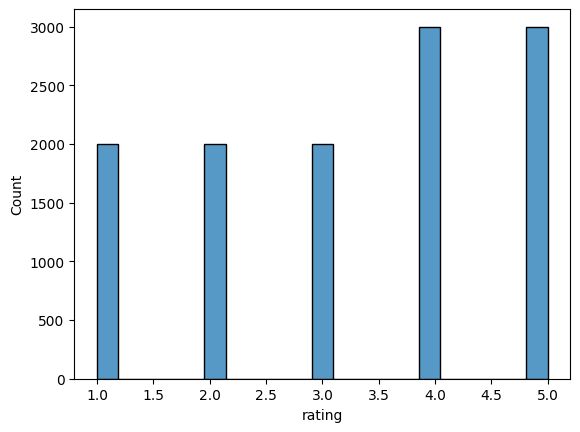

In [24]:
sns.histplot(data['rating'])

In [25]:
# If the rating is less than 3, it's treated as a negative review → 0
# If the rating is 3 or more, it's treated as a positive review → 1

def convert_rating(rating):
    if rating < 3:
        return 0  # negative
    else:
        return 1  # positive

data['rating'] = data['rating'].apply(convert_rating)

In [26]:
data

,reviewText,rating
0,"Jace Rankin may be short, but he's nothing to ...",1
1,Great short read. I didn't want to put it dow...,1
2,I'll start by saying this is the first of four...,1
3,Aggie is Angela Lansbury who carries pocketboo...,1
4,I did not expect this type of book to be in li...,1
...,...,...
11995,Valentine cupid is a vampire- Jena and Ian ano...,1
11996,I have read all seven books in this series. Ap...,1
11997,This book really just wasn't my cuppa. The si...,1
11998,"tried to use it to charge my kindle, it didn't...",0


In [27]:
data['rating'].value_counts()

,count
rating,
1,8000
0,4000


In [29]:
# Lower All the cases
data['reviewText']=data['reviewText'].str.lower()
data

,reviewText,rating
0,"jace rankin may be short, but he's nothing to ...",1
1,great short read. i didn't want to put it dow...,1
2,i'll start by saying this is the first of four...,1
3,aggie is angela lansbury who carries pocketboo...,1
4,i did not expect this type of book to be in li...,1
...,...,...
11995,valentine cupid is a vampire- jena and ian ano...,1
11996,i have read all seven books in this series. ap...,1
11997,this book really just wasn't my cuppa. the si...,1
11998,"tried to use it to charge my kindle, it didn't...",0


In [30]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
from bs4 import BeautifulSoup

## Removing special characters
data['reviewText']=data['reviewText'].apply(lambda x:re.sub('[^a-z A-z 0-9-]+', '',x))
## Remove the stopswords
data['reviewText']=data['reviewText'].apply(lambda x:" ".join([y for y in x.split() if y not in stopwords.words('english')]))
## Remove url
data['reviewText']=data['reviewText'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x)))
## Remove html tags
data['reviewText']=data['reviewText'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())
## Remove any additional spaces
data['reviewText']=data['reviewText'].apply(lambda x: " ".join(x.split()))

In [32]:
data

,reviewText,rating
0,jace rankin may short hes nothing mess man hau...,1
1,great short read didnt want put read one sitti...,1
2,ill start saying first four books wasnt expect...,1
3,aggie angela lansbury carries pocketbooks inst...,1
4,expect type book library pleased find price right,1
...,...,...
11995,valentine cupid vampire- jena ian another vamp...,1
11996,read seven books series apocalypticadventure o...,1
11997,book really wasnt cuppa situation man capturin...,1
11998,tried use charge kindle didnt even register ch...,0


In [35]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [33]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    words = text.split()  # Split the sentence into words
    lemmatized = []       # Create an empty list to store results

    for word in words:
        new_word = lemmatizer.lemmatize(word)  # Lemmatize each word
        lemmatized.append(new_word)            # Add it to the list

    return " ".join(lemmatized)  # Join lemmatized words back into a sentence

In [36]:
# Apply lemmatization to each review one by one
def apply_lemmatization(review):
    return lemmatize_words(review)

# Update the 'reviewText' column with lemmatized text
data['reviewText'] = data['reviewText'].apply(apply_lemmatization)

In [37]:
data

,reviewText,rating
0,jace rankin may short he nothing mess man haul...,1
1,great short read didnt want put read one sitti...,1
2,ill start saying first four book wasnt expecti...,1
3,aggie angela lansbury carry pocketbook instead...,1
4,expect type book library pleased find price right,1
...,...,...
11995,valentine cupid vampire- jena ian another vamp...,1
11996,read seven book series apocalypticadventure on...,1
11997,book really wasnt cuppa situation man capturin...,1
11998,tried use charge kindle didnt even register ch...,0


In [38]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['reviewText'], data['rating'], test_size=0.20)

In [39]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit on training data and transform it into vectors
X_train_bow = vectorizer.fit_transform(X_train).toarray()

# Only transform the test data (no fitting)
X_test_bow = vectorizer.transform(X_test).toarray()

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the TF-IDF vectorizer
tfidf = TfidfVectorizer()

# Learn vocabulary from training data and transform it
X_train_tfidf = tfidf.fit_transform(X_train).toarray()

# Transform the test data using the same vocabulary
X_test_tfidf = tfidf.transform(X_test).toarray()

In [41]:
from sklearn.naive_bayes import GaussianNB

# Train the Naive Bayes model using Bag of Words features
nb_model_bow = GaussianNB().fit(X_train_bow, y_train)

# Train the Naive Bayes model using TF-IDF features
nb_model_tfidf = GaussianNB().fit(X_train_tfidf, y_train)

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Predict using Bag of Words features
y_pred_bow = nb_model_bow.predict(X_test_bow)

# Evaluate Bag of Words model
print("Confusion Matrix (BOW):")
print(confusion_matrix(y_test, y_pred_bow))
print("BOW Accuracy:", accuracy_score(y_test, y_pred_bow))

Confusion Matrix (BOW):
[[518 296]
 [698 888]]
BOW Accuracy: 0.5858333333333333


In [43]:
# Predict using TF-IDF features
y_pred_tfidf = nb_model_bow.predict(X_test_tfidf)

# Evaluate TF-IDF model
print("\nConfusion Matrix (TF-IDF):")
print(confusion_matrix(y_test, y_pred_tfidf))
print("TF-IDF Accuracy:", accuracy_score(y_test, y_pred_tfidf))


Confusion Matrix (TF-IDF):
[[508 306]
 [684 902]]
TF-IDF Accuracy: 0.5875


In [53]:
# Example text review to predict
new_review_text = "Absolutely loved this book!"

# Preprocess the new review (using the same steps as the training data)
processed_new_review = new_review_text.lower()
processed_new_review = re.sub('[^a-z A-z 0-9-]+', '', processed_new_review)
processed_new_review = " ".join([y for y in processed_new_review.split() if y not in stopwords.words('english')])
processed_new_review = re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(processed_new_review))
processed_new_review = BeautifulSoup(processed_new_review, 'lxml').get_text()
processed_new_review = " ".join(processed_new_review.split())
processed_new_review = lemmatize_words(processed_new_review)

# Transform the processed review using the trained TF-IDF vectorizer
new_review_tfidf = tfidf.transform([processed_new_review]).toarray()

# Predict the sentiment using the trained TF-IDF model
prediction = nb_model_tfidf.predict(new_review_tfidf)

# Print the prediction
sentiment = "Positive" if prediction[0] == 1 else "Negative"
print(f"Review: '{new_review_text}'")
print(f"Predicted Sentiment: {sentiment}")

Review: 'Absolutely loved this book!'
Predicted Sentiment: Negative
